In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
sns.set(style='ticks')

import configparser
config = configparser.ConfigParser()

config.read("../final_project_files/env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

In [2]:
colors = "YlGnBu"
OHCO = ['book_title', 'chap_num']

In [3]:
tfidf_books = pd.read_csv(f"{output_dir}\\l2_norm_books.csv").set_index(OHCO[:1])
tfidf_chaps = pd.read_csv(f"{output_dir}\\l2_norm_chaps.csv").set_index(OHCO[:2])

In [4]:
tfidf_books.head()

movements   lighter  personal   forming  cracking  \
book_title                                                                
01_a_game_of_thrones   0.024859  0.021412  0.027675  0.010706  0.024859   
01_into_the_wild       0.000000  0.019509  0.000000  0.019509  0.050429   
01_the_fire_within     0.023426  0.023426  0.037129  0.037129  0.037129   
02_a_clash_of_kings    0.010283  0.020565  0.016298  0.016298  0.010283   
02_fire_and_ice        0.018753  0.018753  0.000000  0.000000  0.000000   

                         noble  concerns  finished     giant   heaving  ...  \
book_title                                                              ...   
01_a_game_of_thrones  0.050324  0.021412  0.050907  0.048430  0.021412  ...   
01_into_the_wild      0.039017  0.019509  0.085688  0.000000  0.030920  ...   
01_the_fire_within    0.000000  0.000000  0.023426  0.023426  0.023426  ...   
02_a_clash_of_kings   0.038051  0.023876  0.046514  0.047146  0.010283  ...   
02_fire_and_ice       0.000000  0.018753  0.064875  0.018753  0.059446  ...   

                         crush   divided    snatch    fright    cracks  \
book_title                                                               
01_a_game_of_thrones  0.019581  0.019581  0.019581  0.019581  0.028686   
01_into_the_wild      0.000000  0.000000  0.022512  0.000000  0.000000   
01_the_fire_within    0.000000  0.000000  0.000000  0.054065  0.027032   
02_a_clash_of_kings   0.018807  0.030672  0.011866  0.011866  0.037613   
02_fire_and_ice       0.000000  0.034299  0.000000  0.021640  0.034299   

                      crumpled    unseen  scratches  whipping     shoes  
book_title                                                               
01_a_game_of_thrones  0.019581  0.028686   0.024709  0.000000  0.012354  
01_into_the_wild      0.000000  0.022512   0.058193  0.000000  0.000000  
01_the_fire_within    0.054065  0.000000   0.000000  0.000000  0.062767  
02_a_clash_of_kings   0.000000  0.041049   0.027551  0.011866  0.035597  
02_fire_and_ice       0.021640  0.000000   0.021640  0.021640  0.000000  

[5 rows x 1000 columns]

In [5]:
tfidf_chaps.head()

put       old      much     heard  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.041146  0.061820  0.020473  0.057382   
                     2         0.062771  0.062873  0.038301  0.056019   
                     3         0.042933  0.081396  0.000000  0.042655   
                     4         0.019784  0.068554  0.031205  0.031154   
                     5         0.040947  0.047615  0.032292  0.000000   

                                 called       don       get     found  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.041347  0.040615  0.020876  0.052240   
                     2         0.038676  0.023970  0.024641  0.061660   
                     3         0.043143  0.000000  0.000000  0.042173   
                     4         0.063021  0.050482  0.031819  0.030802   
                     5         0.020573  0.032031  0.020775  0.020111   

                                   seen       say  ...    riders    steady  \
book_title           chap_num                      ...                       
01_a_game_of_thrones 1         0.058797  0.031927  ...  0.000000  0.000000   
                     2         0.039182  0.023776  ...  0.068688  0.000000   
                     3         0.055152  0.026522  ...  0.000000  0.000000   
                     4         0.031923  0.038742  ...  0.000000  0.000000   
                     5         0.048395  0.056275  ...  0.057912  0.057912   

                               faced  amber     twins     dried   marched  \
book_title           chap_num                                               
01_a_game_of_thrones 1           0.0    0.0  0.058194  0.000000  0.000000   
                     2           0.0    0.0  0.000000  0.000000  0.000000   
                     3           0.0    0.0  0.000000  0.076622  0.000000   
                     4           0.0    0.0  0.000000  0.000000  0.000000   
                     5           0.0    0.0  0.000000  0.000000  0.057912   

                               chambers  chains  nearby  
book_title           chap_num                            
01_a_game_of_thrones 1              0.0     0.0     0.0  
                     2              0.0     0.0     0.0  
                     3              0.0     0.0     0.0  
                     4              0.0     0.0     0.0  
                     5              0.0     0.0     0.0  

[5 rows x 1000 columns]

In [6]:
LIB = pd.read_csv(f"{output_dir}\\LIB_LABELS.csv").set_index(OHCO[:1])

In [7]:
LIB.head()

book_length  n_chaps                  series  year  \
book_title                                                                 
01_a_game_of_thrones       297169       73                  ASOIAF  1996   
01_into_the_wild            64386       26            Warrior_Cats  2003   
01_the_fire_within          51223       42  Last_Dragon_Chronicles  2001   
02_a_clash_of_kings        324987       70                  ASOIAF  1998   
02_fire_and_ice             73544       31            Warrior_Cats  2003   

                                  author  \
book_title                                 
01_a_game_of_thrones  George R.R. Martin   
01_into_the_wild               Kate Cary   
01_the_fire_within         Chris D'Lacey   
02_a_clash_of_kings   George R.R. Martin   
02_fire_and_ice                Kate Cary   

                                                                label  \
book_title                                                              
01_a_game_of_thrones  George R.R. Martin: 01_a_game_of_thrones (1996)   
01_into_the_wild                   Kate Cary: 01_into_the_wild (2003)   
01_the_fire_within           Chris D'Lacey: 01_the_fire_within (2001)   
02_a_clash_of_kings    George R.R. Martin: 02_a_clash_of_kings (1998)   
02_fire_and_ice                     Kate Cary: 02_fire_and_ice (2003)   

                      y_raw_3  y_L2_3  y_raw_4  y_L2_4  
book_title                                              
01_a_game_of_thrones        1       2        1       0  
01_into_the_wild            2       1        0       1  
01_the_fire_within          0       0        2       3  
02_a_clash_of_kings         1       2        1       0  
02_fire_and_ice             2       1        0       1

### PCA Components

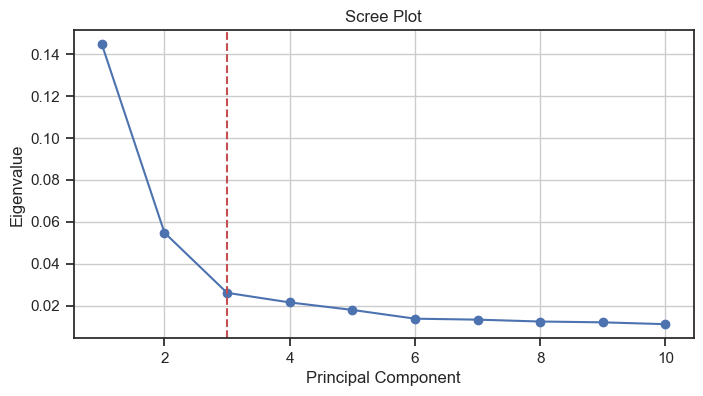

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = tfidf_books.fillna(0)

pca = PCA(n_components=10).fit(X)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Creating a Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# Optional: Add a line to emphasize the "elbow"
plt.axvline(x=3, color='r', linestyle='--')

plt.grid(True)
plt.show()

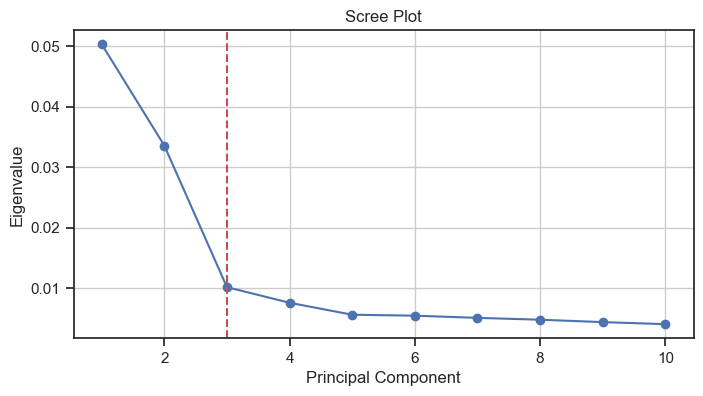

In [9]:
X = tfidf_chaps.fillna(0)

pca = PCA(n_components=10).fit(X)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Creating a Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# Optional: Add a line to emphasize the "elbow"
plt.axvline(x=3, color='r', linestyle='--')

plt.grid(True)
plt.show()

In [10]:
n_comps = 3
pca_engine = PCA(n_components=n_comps)

In [11]:
pca = pca_engine.fit_transform(tfidf_books.fillna(0))

In [12]:
pca2 = pca_engine.fit_transform(tfidf_chaps.fillna(0))

In [13]:
pca_df = pd.DataFrame(pca, columns=[f'PC{i+1}' for i in range(pca.shape[1])])
pca2_df = pd.DataFrame(pca2, columns=[f'PC{i+1}' for i in range(pca2.shape[1])])

In [14]:
pca_df.to_csv(f"{output_dir}\\pca_books.csv")
pca2_df.to_csv(f"{output_dir}\\pca_chaps.csv")

### PCA DCM

In [15]:
DCM = pd.DataFrame(pca, index=tfidf_books.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','label']], on='book_title')
DCM.reset_index(inplace=True)
DCM['year'] = DCM.label.str.split(', ').str[0].str.split(' ').str[-1]
DCM.set_index(['book_title'], inplace=True)

DCM2 = pd.DataFrame(pca2, index=tfidf_chaps.index)
DCM2.columns = ['PC{}'.format(i) for i in DCM2.columns]
DCM2 = DCM2.join(LIB[['author','label']], on='book_title')
DCM2.reset_index(inplace=True)
DCM2['year'] = DCM2.label.str.split(', ').str[0].str.split(' ').str[-1]
DCM2['label'] = DCM2.label.str.split(', ').str[0].str.split('_').str[0] + ' - ' +  DCM2.chap_num.astype('str')
DCM2.set_index(['book_title', 'chap_num'], inplace=True)

In [16]:
DCM.head(2)

PC0       PC1       PC2              author  \
book_title                                                               
01_a_game_of_thrones -0.092002  0.330499  0.051282  George R.R. Martin   
01_into_the_wild      0.484954 -0.078947  0.222095           Kate Cary   

                                                                label    year  
book_title                                                                     
01_a_game_of_thrones  George R.R. Martin: 01_a_game_of_thrones (1996)  (1996)  
01_into_the_wild                   Kate Cary: 01_into_the_wild (2003)  (2003)

In [17]:
DCM2.head(2)

PC0       PC1       PC2  \
book_title           chap_num                                 
01_a_game_of_thrones 1        -0.149574 -0.055349  0.204496   
                     2        -0.212930 -0.034409  0.071722   

                                           author                       label  \
book_title           chap_num                                                   
01_a_game_of_thrones 1         George R.R. Martin  George R.R. Martin: 01 - 1   
                     2         George R.R. Martin  George R.R. Martin: 01 - 2   

                                 year  
book_title           chap_num          
01_a_game_of_thrones 1         (1996)  
                     2         (1996)

In [18]:
def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

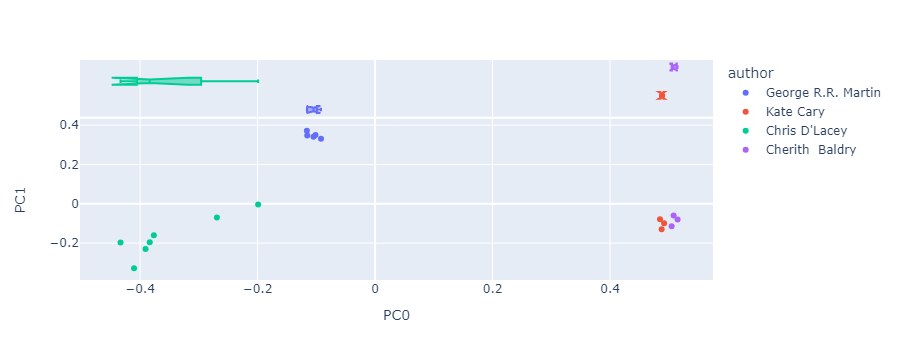

In [19]:
vis_pcs(DCM, 0, 1)

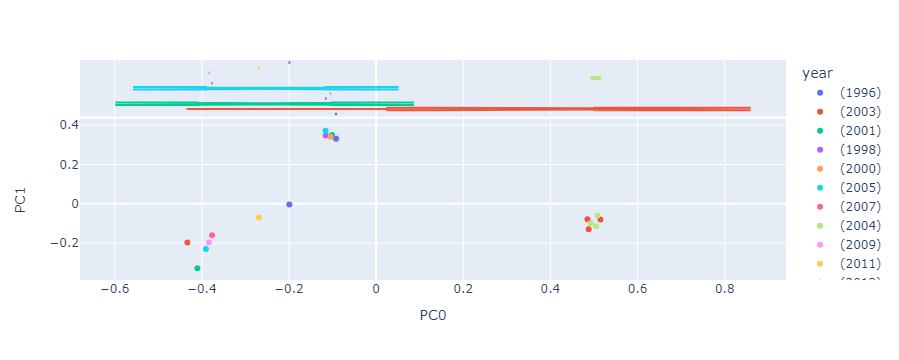

In [20]:
vis_pcs(DCM, 0, 1, label='year')

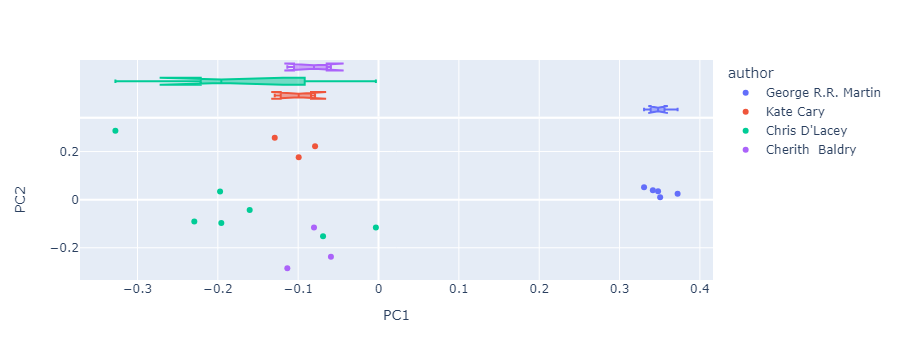

In [21]:
vis_pcs(DCM, 1, 2)

In [22]:
import time
import plotly.io as pio

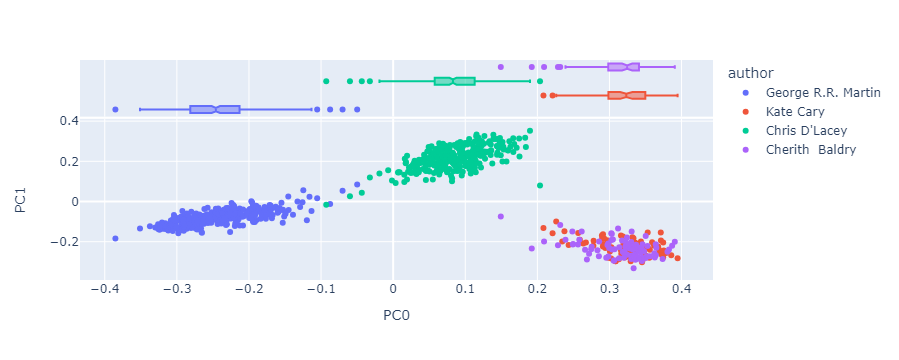

In [23]:
fig = vis_pcs(DCM2, 0, 1)
fig

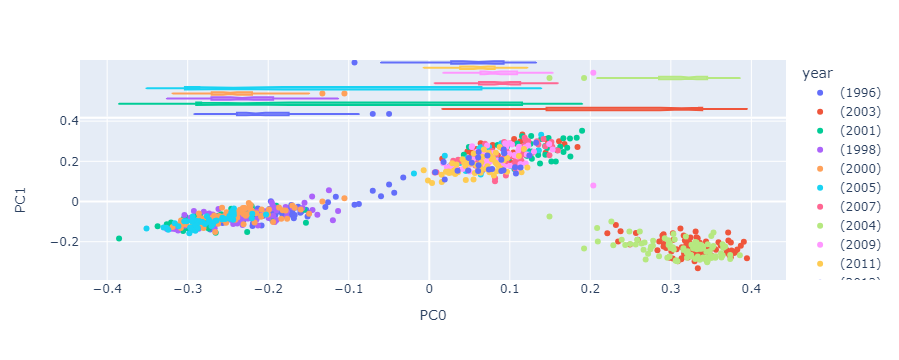

In [24]:
vis_pcs(DCM2, 0, 1, label='year')

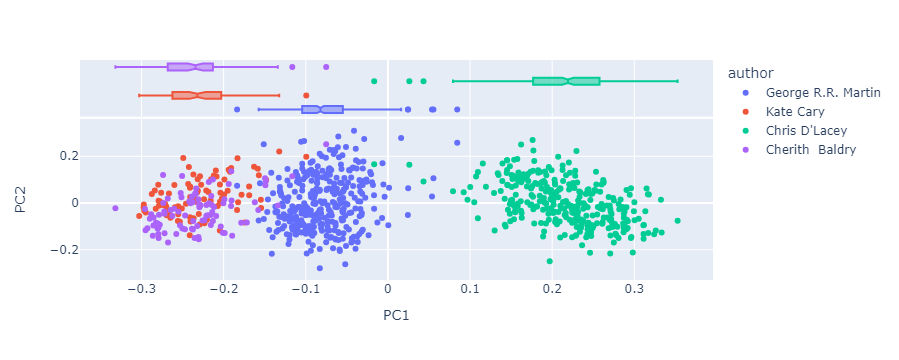

In [25]:
fig = vis_pcs(DCM2, 1, 2)
# fig.write_image(f"{output_dir}\\pca_v2_chaps.png")
fig

In [26]:
DCM.to_csv(f"{output_dir}\\DCM_books.csv")
DCM2.to_csv(f"{output_dir}\\DCM_chaps.csv")

### PCA Loadings

In [27]:
LOADINGS = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
LOADINGS.columns = ["PC{}".format(i) for i in LOADINGS.columns]
LOADINGS.index = tfidf_books.columns
LOADINGS.index.name = 'term_str'

LOADINGS2 = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
LOADINGS2.columns = ["PC{}".format(i) for i in LOADINGS2.columns]
LOADINGS2.index = tfidf_chaps.columns
LOADINGS2.index.name = 'term_str'

In [28]:
top_terms_sk = {}

data = []
for i in range(n_comps):
    for j in [0, 1]:
        data.append((f"PC{i}", j, ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())))

comp_strs = pd.DataFrame(data)
comp_strs.columns =  ['pc', 'pole', 'top_terms']
comp_strs = comp_strs.set_index(['pc', 'pole'])

top_terms_sk2 = {}

data2 = []
for i in range(n_comps):
    for j in [0, 1]:
        data2.append((f"PC{i}", j, ' '.join(LOADINGS2.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())))

comp_strs2 = pd.DataFrame(data2)
comp_strs2.columns =  ['pc', 'pole', 'top_terms']
comp_strs2 = comp_strs2.set_index(['pc', 'pole'])

In [29]:
comp_strs.unstack()

top_terms  \
pole                                                  0   
pc                                                        
PC0   newborn trailing glazed female endless directi...   
PC1   punched served quicker due uttered splinters d...   
PC2   serve hooked hundred screeched fighting arroga...   

                                                         
pole                                                  1  
pc                                                       
PC0   matters whirling sparkled scowled spill bold p...  
PC1   newborn trailing endless female glazed studyin...  
PC2   punched quicker pretend tearing loosened tries...

In [30]:
comp_strs2.unstack()

top_terms  \
pole                                                  0   
pc                                                        
PC0   meowed cats kits warriors warrior den mewed ap...   
PC1   gadzooks said dragons rst ngers nd ok bears ha...   
PC2   screamed shouted trees flames feet wings falli...   

                                                         
pole                                                  1  
pc                                                       
PC0   men gods red hundred lords fingers queen broth...  
PC1   meowed cats warrior warriors kits forest mewed...  
PC2   gadzooks dragons queen has wed write ask does ...

In [31]:
LOADINGS.head(2)

PC0       PC1       PC2
term_str                               
movements -0.005118  0.008299 -0.003318
lighter   -0.009468 -0.008238 -0.000434

In [32]:
VSHORT_books = pd.read_csv(f"{output_dir}\\VSHORT_books.csv").set_index('term_str')
VSHORT_chaps = pd.read_csv(f"{output_dir}\\VSHORT_chaps.csv").set_index('term_str')

In [33]:
VSHORT_books.head(2)

n max_pos      dfidf  mean_tfidf
term_str                                    
movements  40     NNS  18.774517    1.819973
lighter    32     JJR  18.774517    1.612512

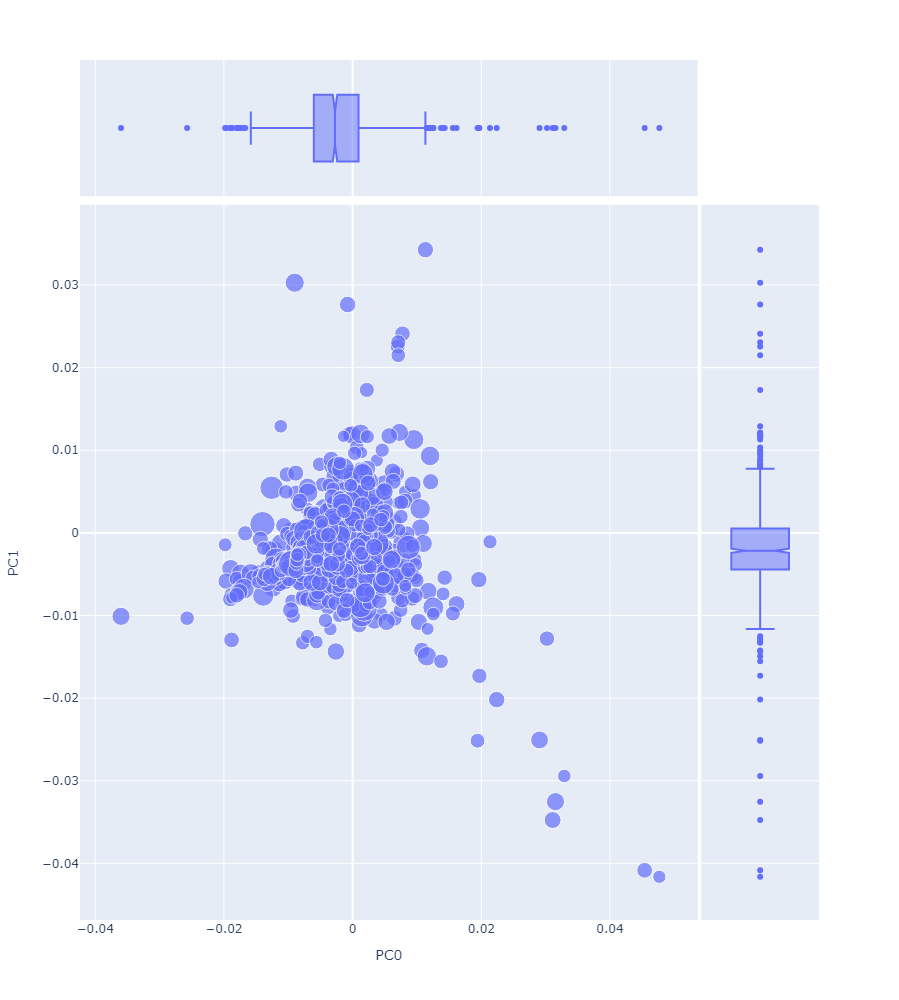

In [34]:
px.scatter(LOADINGS.join(VSHORT_books).reset_index(), 'PC0', 'PC1', hover_name='term_str', 
           size='mean_tfidf', 
           marginal_x='box', marginal_y='box', height=1000)

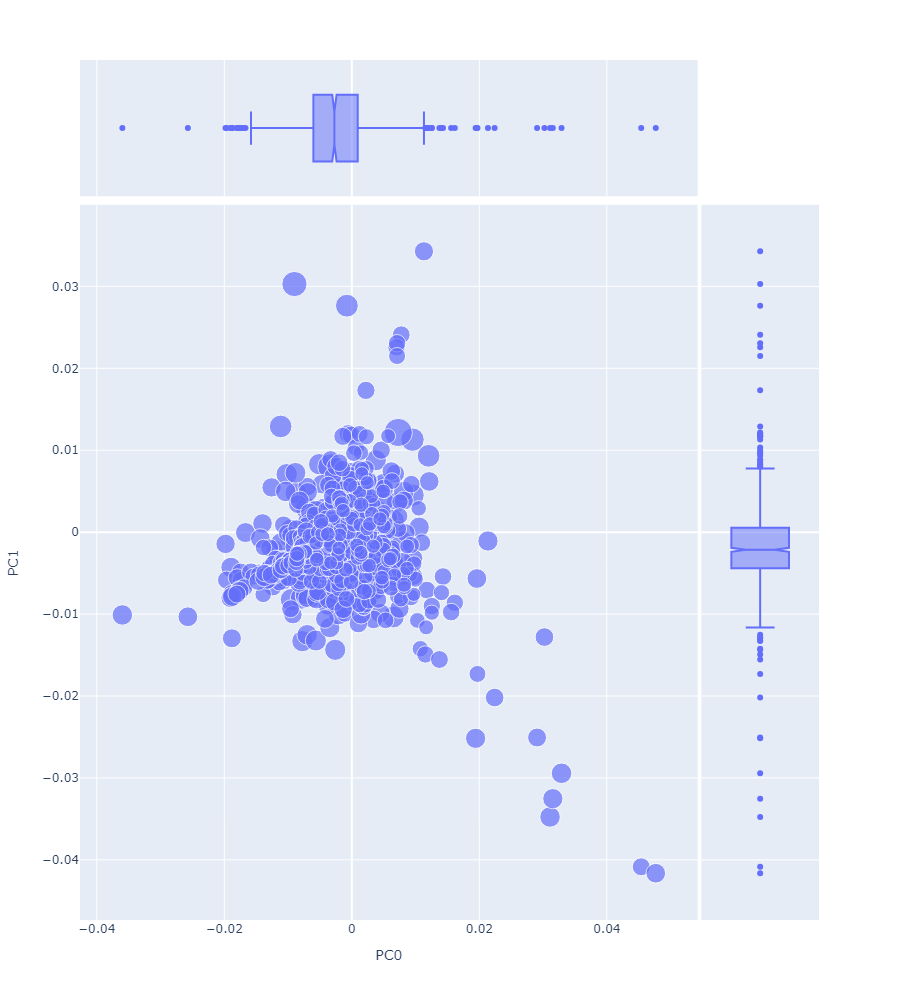

In [35]:
fig = px.scatter(LOADINGS2.join(VSHORT_chaps).reset_index(), 'PC0', 'PC1', hover_name='term_str', 
           size='mean_tfidf', 
           marginal_x='box', marginal_y='box', height=1000)
# fig.write_image(f"{output_dir}\\pca_v1.2_chaps.png")
fig

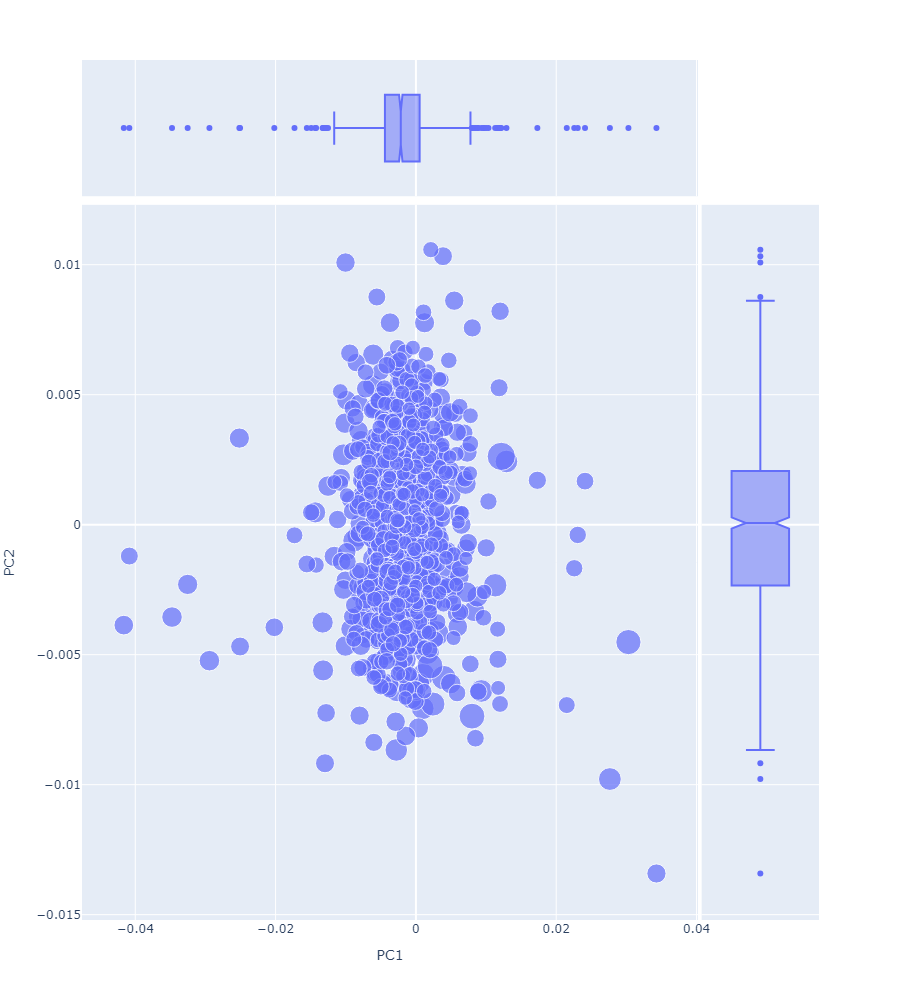

In [36]:
fig = px.scatter(LOADINGS2.join(VSHORT_chaps).reset_index(), 'PC1', 'PC2', hover_name='term_str', 
           size='mean_tfidf', 
           marginal_x='box', marginal_y='box', height=1000)
# fig.write_image(f"{output_dir}\\pca_v2.2_chaps.png")
fig

In [37]:
DOC_books = pd.DataFrame(index=tfidf_books.index).join(LIB)
# DOC_books.head(2)

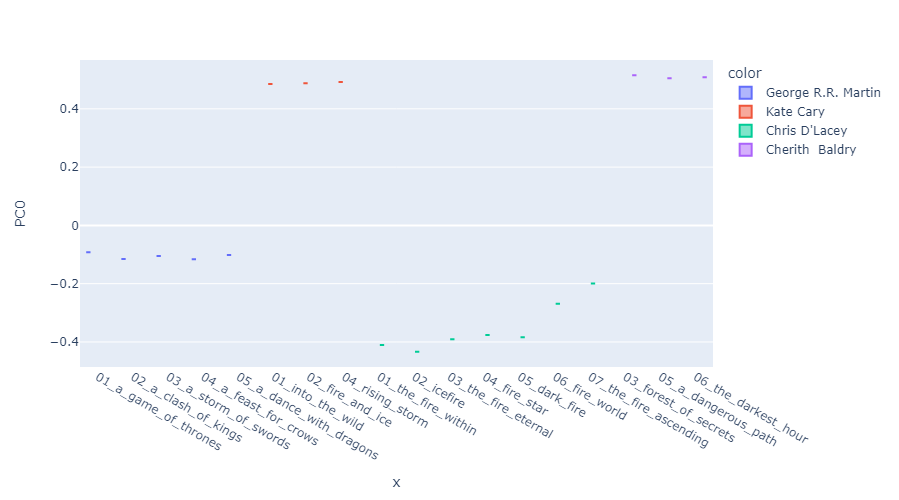

In [38]:
px.box(DCM, x=DOC_books.index, y='PC0', height=500, color=DOC_books.author)

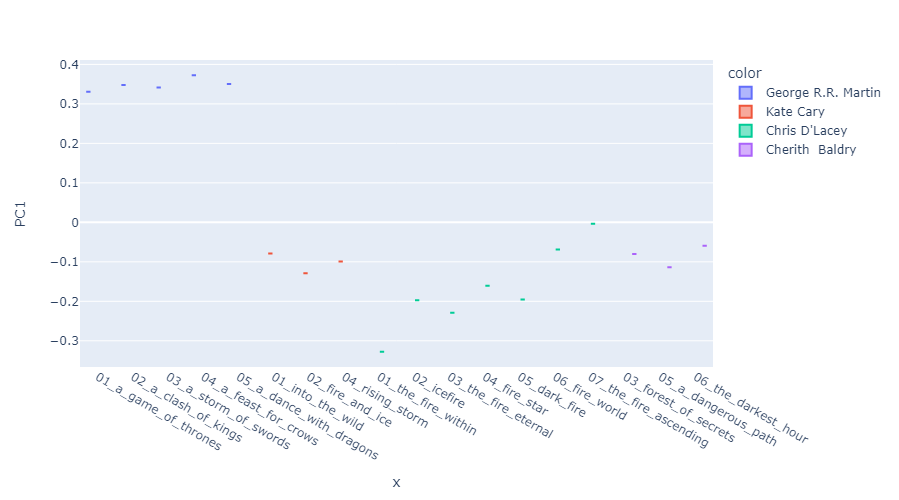

In [39]:
px.box(DCM, x=DOC_books.index, y='PC1', height=500, color=DOC_books.author)

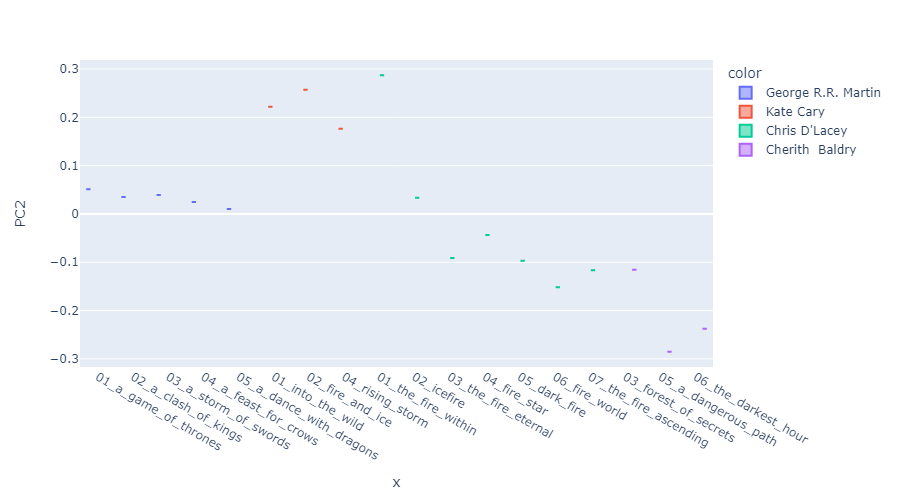

In [40]:
px.box(DCM, x=DOC_books.index, y='PC2', height=500, color=DOC_books.author)

In [41]:
DOC_chaps = pd.DataFrame(index=tfidf_chaps.index).join(LIB)
# DOC_chaps.head(2)

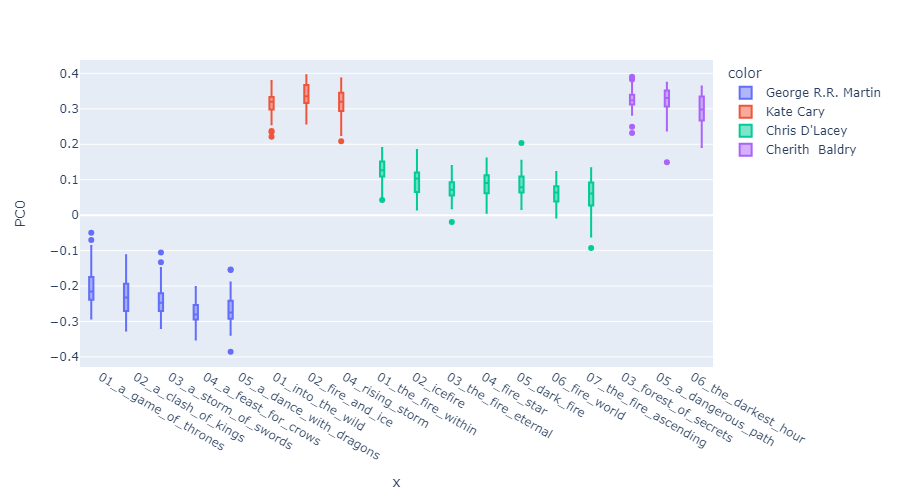

In [42]:
px.box(DCM2, x=DOC_chaps.index.get_level_values(0), y='PC0', height=500, color=DOC_chaps.author)

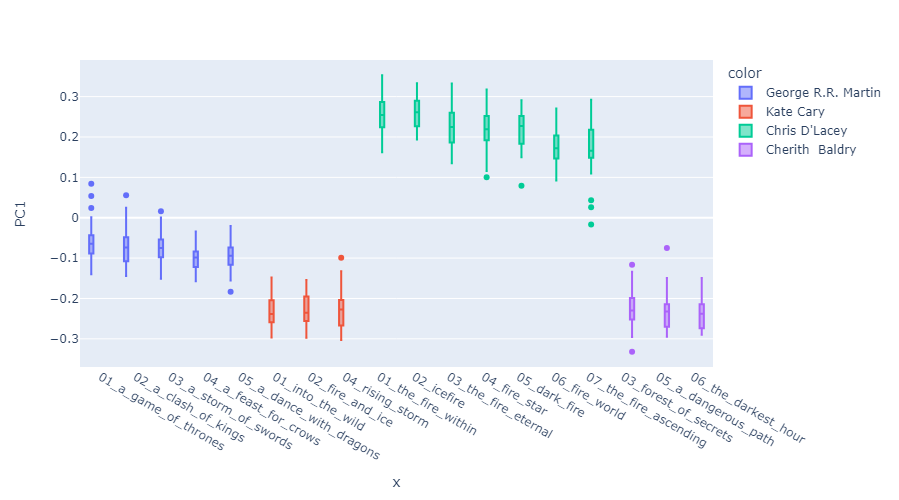

In [43]:
px.box(DCM2, x=DOC_chaps.index.get_level_values(0), y='PC1', height=500, color=DOC_chaps.author)

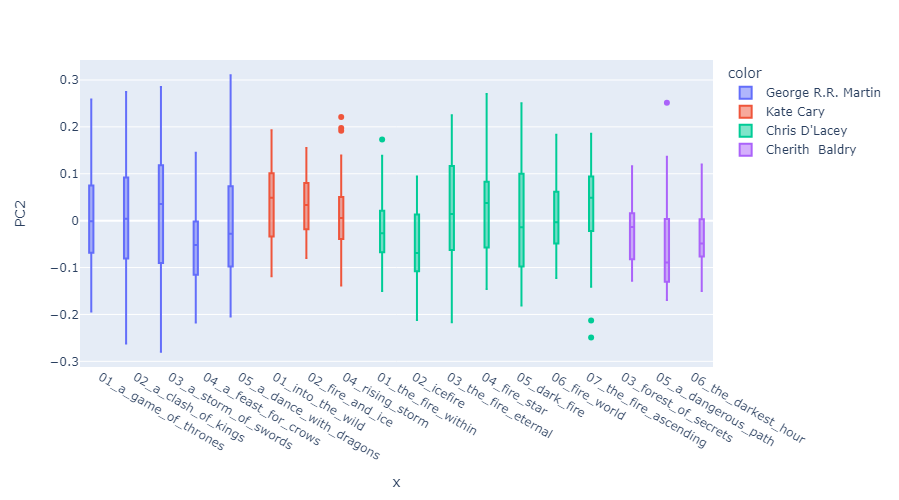

In [44]:
px.box(DCM2, x=DOC_chaps.index.get_level_values(0), y='PC2', height=500, color=DOC_chaps.author)